<a href="https://colab.research.google.com/github/stepsbtw/Algoritmos/blob/main/maratona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TWO POINTERS
Problemas que envolvem subarrays, substrings, ou pares de elementos.

Quando você quer evitar soluções quadráticas (O(n²)) e busca uma solução linear (O(n)) ou quase linear.

Exemplos: encontrar soma em subarray, merge de dois arrays ordenados, substrings com propriedades específicas.

In [38]:
def two_sum(arr, x):
    left, right = 0, len(arr) - 1
    while left < right:
        s = arr[left] + arr[right]
        if s == x:
            return True
        elif s < x:
            left += 1
        else:
            right -= 1
    return False

### SLIDING WINDOW
Usamos dois ponteiros, left e right, que definem uma janela na string.

Expandimos o right para incluir mais caracteres até ultrapassar K distintos.

Quando ultrapassar, movemos left para reduzir a janela até voltar a ter no máximo K caracteres distintos.

Mantemos o tamanho máximo da janela válida.

In [39]:
def longest_substring_k_distinct(s, k):
    from collections import defaultdict

    count = defaultdict(int)
    left = 0
    max_len = 0

    for right in range(len(s)):
        count[s[right]] += 1

        while len(count) > k:
            count[s[left]] -= 1
            if count[s[left]] == 0:
                del count[s[left]]
            left += 1

        max_len = max(max_len, right - left + 1)

    return max_len

## SEGMENT TREE
É uma árvore binária onde cada nó representa um intervalo (segmento) do array original, armazenando uma informação agregada desse intervalo (ex: soma, mínimo, máximo).

Para responder consultas de intervalo rapidamente (ex: soma do intervalo [l, r], mínimo, máximo).

Para atualizar valores do array rapidamente e refletir nas consultas.

Consultas e atualizações geralmente são feitas em O(log n), muito melhor que uma abordagem ingênua O(n).

### COMO
A raiz representa o intervalo inteiro [0, n-1].

Cada nó divide o intervalo em duas metades e cria dois filhos.

Nos nós folhas ficam os valores do array.

Nós internos armazenam o resultado da função (ex: soma) aplicada aos seus filhos.

In [40]:
def build_tree(arr, tree, node, start, end):
    if start == end:
        tree[node] = arr[start]
    else:
        mid = (start + end) // 2
        build_tree(arr, tree, 2*node+1, start, mid)
        build_tree(arr, tree, 2*node+2, mid+1, end)
        tree[node] = tree[2*node+1] + tree[2*node+2]

def update_tree(tree, node, start, end, idx, val):
    if start == end:
        tree[node] = val
    else:
        mid = (start + end) // 2
        if idx <= mid:
            update_tree(tree, 2*node+1, start, mid, idx, val)
        else:
            update_tree(tree, 2*node+2, mid+1, end, idx, val)
        tree[node] = tree[2*node+1] + tree[2*node+2]

def query_tree(tree, node, start, end, l, r):
    if r < start or end < l:
        return 0
    if l <= start and end <= r:
        return tree[node]
    mid = (start + end) // 2
    left_sum = query_tree(tree, 2*node+1, start, mid, l, r)
    right_sum = query_tree(tree, 2*node+2, mid+1, end, l, r)
    return left_sum + right_sum

In [41]:
# Exemplo de uso:
arr = [1, 3, 5, 7, 9, 11]
n = len(arr)
tree = [0] * (4 * n)

build_tree(arr, tree, 0, 0, n-1)
print(query_tree(tree, 0, 0, n-1, 1, 3))  # soma de índices 1 a 3: 3+5+7=15

update_tree(tree, 0, 0, n-1, 1, 10)  # atualiza índice 1 para 10
print(query_tree(tree, 0, 0, n-1, 1, 3))  # agora soma: 10+5+7=22


15
22


### BITMASKS
É um número inteiro usado para representar um conjunto de elementos onde cada bit representa se um elemento está presente (1) ou ausente (0).

Exemplo:

    O número binário 1010 (base 2) representa um conjunto onde o elemento 1 e 3 estão presentes (bits na posição 1 e 3 são 1).

    Em decimal, 1010₂ = 10₁₀.

### PORQUE?
Para representar subconjuntos de forma eficiente.

Operações rápidas usando operadores bit a bit (&, |, ^, ~, <<, >>).

Reduz o uso de memória.

Muito usada em programação competitiva para DP com estados (ex: TSP, problemas de cobertura).

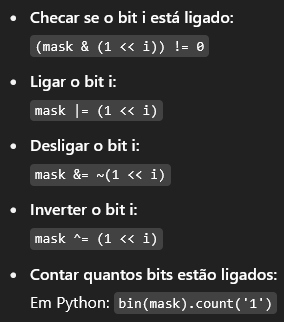

In [42]:
arr = [1, 2, 3]
n = len(arr)

for mask in range(1 << n):  # de 0 até 2^n - 1
    subset = []
    for i in range(n):
        if mask & (1 << i):
            subset.append(arr[i])
    print(subset)


[]
[1]
[2]
[1, 2]
[3]
[1, 3]
[2, 3]
[1, 2, 3]


### DINAMIC PROGRAMMING COM BITMASK  (TSP)
Usamos uma máscara de bits (bitmask) para representar quais elementos (ex: cidades) já foram visitados.

O DP vai guardar resultados para cada estado (bitmask) e posição atual.

Geralmente o estado é algo tipo dp[mask][pos] = melhor custo ao estar na pos com conjunto mask de cidades já visitadas.


In [43]:
INF = 10**9

def tsp(dist):
    n = len(dist)
    dp = [[INF] * n for _ in range(1 << n)]
    dp[1][0] = 0  # começamos na cidade 0, só cidade 0 visitada

    for mask in range(1 << n):
        for u in range(n):
            if not (mask & (1 << u)):
                continue
            for v in range(n):
                if mask & (1 << v):
                    continue
                next_mask = mask | (1 << v)
                dp[next_mask][v] = min(dp[next_mask][v], dp[mask][u] + dist[u][v])

    # Retorna custo mínimo de visitar todas e voltar para 0
    full_mask = (1 << n) - 1
    ans = min(dp[full_mask][u] + dist[u][0] for u in range(n))
    return ans

In [44]:
# Exemplo de uso
dist = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print(tsp(dist))  # saída: 80


80


### PREFIX SUM
É um array auxiliar onde cada posição i armazena a soma dos elementos do array original desde o início até o índice i.

Por que usar?

    Para responder rapidamente perguntas do tipo: qual a soma dos elementos entre os índices l e r?

    Com prefix sum, essa consulta fica em O(1), após O(n) de pré-processamento.

In [45]:
arr = [2, 4, 5, 7, 8]
prefix = [0] * (len(arr) + 1)
for i in range(len(arr)):
    prefix[i+1] = prefix[i] + arr[i]

# Soma de índice 1 até 3 (4 + 5 + 7)
l, r = 1, 3
print(prefix[r+1] - prefix[l])  # saída: 16


16


### BUSCA TERNÁRIA
A busca ternária é uma técnica para encontrar o máximo ou mínimo de uma função unimodal (que sobe e depois desce, ou desce e depois sobe) em um intervalo contínuo ou discreto.

PORQUE?

    Quando você tem uma função unimodal (apenas um pico ou vale) e quer achar o ponto ótimo (máximo ou mínimo).

    Não funciona bem para funções com vários picos ou vales.

    Pode ser usada para busca em valores reais ou inteiros.

Como funciona?

    Divide o intervalo em três partes, testando dois pontos internos m1 e m2.

    Compara os valores da função nesses pontos:

        Se f(m1) < f(m2) e queremos máximo, descartamos a parte antes de m1.

        Se f(m1) > f(m2), descartamos a parte depois de m2.

    Repete até o intervalo ficar pequeno.

In [46]:
def ternary_search(f, left, right, absolute_precision=1e-7):
    while right - left > absolute_precision:
        m1 = left + (right - left) / 3
        m2 = right - (right - left) / 3

        if f(m1) < f(m2):
            left = m1
        else:
            right = m2

    return (left + right) / 2


In [47]:
def f(x):
    return -(x-2)**2 + 3

res = ternary_search(f, 0, 4)
print(res)        # Aproximadamente 2.0 (o pico da parábola)
print(f(res))     # Aproximadamente 3.0


1.9999999989197295
3.0


## FAST FOURIER TRANSFORM (FFT)
Dividir para conquistar!

    Separamos o vetor a em:

        Termos de índices pares: a0,a2,a4,…a0​,a2​,a4​,…

        Termos de índices ímpares: a1,a3,a5,…a1​,a3​,a5​,…

Chamamos a FFT recursivamente nesses dois "subvetores" de tamanho n/2.
Usamos a simetria das raízes da unidade para combinar os resultados.

In [48]:
import cmath

def fft(a):
    n = len(a)
    if n == 1:
        return a
    w_n = cmath.exp(2j * cmath.pi / n)
    w = 1
    a_even = fft(a[0::2])
    a_odd = fft(a[1::2])
    y = [0] * n
    for k in range(n // 2):
        y[k] = a_even[k] + w * a_odd[k]
        y[k + n // 2] = a_even[k] - w * a_odd[k]
        w *= w_n
    return y


### Multiplicação de Polinômios com FFT

Se temos dois polinômios A(x) e B(x), podemos:

    Transformar os coeficientes usando FFT.

    Multiplicar ponto a ponto.

    Fazer FFT inversa (iFFT) para voltar ao domínio dos coeficientes.

Preenche com zeros até potência de 2 (para FFT funcionar).

FFT dos dois polinômios → converte para o "domínio da frequência".

Multiplica ponto a ponto (convolução).

iFFT → volta ao domínio dos coeficientes.

Arredonda para inteiros.

In [49]:
def ifft(a):
    n = len(a)
    a_conj = [x.conjugate() for x in a]
    y = fft(a_conj)
    return [x.conjugate() / n for x in y]

def multiply_poly(a, b):
    n = 1
    orig_len_a = len(a)
    orig_len_b = len(b)
    while n < orig_len_a + orig_len_b - 1:
        n *= 2
    a += [0] * (n - orig_len_a)
    b += [0] * (n - orig_len_b)

    A = fft(a)
    B = fft(b)
    C = [A[i] * B[i] for i in range(n)]
    c = ifft(C)

    tamanho_resultado = orig_len_a + orig_len_b - 1
    return [round(c[i].real) for i in range(tamanho_resultado)]

In [50]:
a = [1, 2, 3]  # 1 + 2x + 3x^2
b = [4, 5, 6]  # 4 + 5x + 6x^2

res = multiply_poly(a, b)
print("Produto:", res)

Produto: [4, 13, 28, 27, 18]
